In [1]:
import os
import geopandas as gpd
import pandas as pd
import gc

In [2]:
%load_ext autoreload
import icebath as icebath
from icebath.core import bathy_workflow
%autoreload 2

In [3]:
import dask
from dask.distributed import Client, LocalCluster
client = Client(processes=True, n_workers=1, threads_per_worker=1, memory_limit='14GB', dashboard_address=':8787')
client

Client Scheduler: tcp://127.0.0.1:56893 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 1 Memory: 14.00 GB


In [4]:
# set up variables to run
# inpardir = '/Users/jessica/projects/bathymetry_from_bergs/DEMs/2m/'
# fjord = 'JI'
# metastr='_mdf'

# inpardir = '/Volumes/Keeper/bathy_from_bergs_Kane_imagery_2021/Kane-no_usable_bergs/'
inpardir = '/Users/jessica/projects/bathymetry_from_bergs/DEMs/KaneW2W2/'
fjord="KB"
metastr="_meta"

outdir = "/Users/jessica/projects/bathymetry_from_bergs/results/"

In [5]:
dirlist = [d for d in os.listdir(inpardir) if not d.startswith('.')]

In [6]:
print(dirlist)

['W2W2_20130510_10300100218D7000_1030010022056900_2m_lsf_v030208']


In [7]:
def recursive_dir_size(path):
    size = 0

    for x in os.listdir(path):
        if not os.path.isdir(os.path.join(path,x)):
            size += os.stat(os.path.join(path,x)).st_size
        else:
            size += recursive_dir_size(os.path.join(path,x))

    # convert to GB
    size = size / (1024.0**3)
    
    return size

/Users/jessica/projects/bathymetry_from_bergs/github/icebath/icebath/core/build_xrds.py:22: UserWarning: This function currently assumes a constant grid and EPSG for all input files
  warnings.warn("This function currently assumes a constant grid and EPSG for all input files")


W2W2_20130510_10300100218D7000_1030010022056900_2m_lsf_seg1_dem.tif
W2W2_20130510_10300100218D7000_1030010022056900_2m_lsf_seg3_dem.tif
W2W2_20130510_10300100218D7000_1030010022056900_2m_lsf_seg2_dem.tif
Please note the transform is computed assuming a coordinate reference system    where x(min) is west and y(min) is south
Note that the new file is reprojected to have the same CRS as the dataset to which it is being added.        However, if the two CRSs are compatible, the spatial properties of the new file may be added to or overwrite the ones of the existing dataset
Note that tide model and epsg are hard coded in!
They can also be provided as keywords if the wrapper function is updated to handle them
The current fjord does not have a minimum berg size entry - using a default value!
Got labeled raster of potential icebergs for an image
about to get the list of possible bergs
Please note the transform computation is very application specific (negative y coordinates) and may need gener

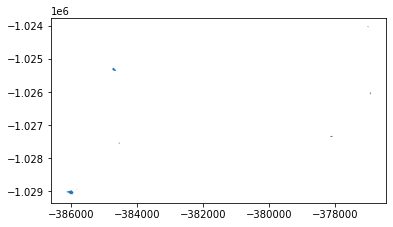

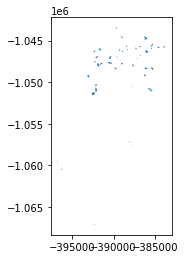

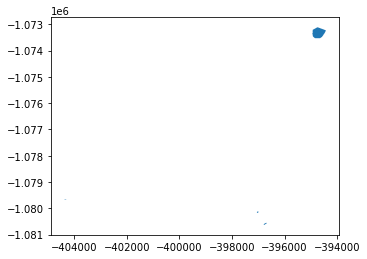

In [8]:
# run the bathymetry-from-iceberg-freeboard workflow on each dem (skipping larger dirs for now)
for indir in dirlist:
#     print(indir)
    try:
#         print(recursive_dir_size(inpardir+indir))
        if recursive_dir_size(inpardir+indir) > 1.0:
            bathy_workflow.run_workflow(inpardir+indir+'/', fjord, outdir, indir[0:14] + "icebergs.gpkg", metastr=metastr, bitmask=True)
        else:
            continue
        gc.collect()
    except NotADirectoryError:
#         if recursive_dir_size(inpardir+indir) < 0.75:
        bathy_workflow.run_workflow(inpardir+'/', fjord, outdir, "JIicebergs.gpkg", metastr=metastr)
        break
#         else:
#             continue        

In [8]:
# run the bathymetry-from-iceberg-freeboard workflow on each dem (skipping larger dirs for now)
for indir in dirlist:
#     print(indir)
    try:
#         print(recursive_dir_size(inpardir+indir))
        if recursive_dir_size(inpardir+indir) > 1.0:
            bathy_workflow.run_workflow(inpardir+indir+'/', fjord, outdir, indir[0:14] + "icebergs.gpkg", metastr=metastr, bitmask=True)
        else:
            continue
        gc.collect()
    except NotADirectoryError:
#         if recursive_dir_size(inpardir+indir) < 0.75:
        bathy_workflow.run_workflow(inpardir+'/', fjord, outdir, "JIicebergs.gpkg", metastr=metastr)
        break
#         else:
#             continue        

/Users/jessica/projects/bathymetry_from_bergs/github/icebath/icebath/core/build_xrds.py:22: UserWarning: This function currently assumes a constant grid and EPSG for all input files
  warnings.warn("This function currently assumes a constant grid and EPSG for all input files")


W2W2_20130510_10300100218D7000_1030010022056900_2m_lsf_seg1_dem.tif
W2W2_20130510_10300100218D7000_1030010022056900_2m_lsf_seg3_dem.tif
W2W2_20130510_10300100218D7000_1030010022056900_2m_lsf_seg2_dem.tif
Please note the transform is computed assuming a coordinate reference system    where x(min) is west and y(min) is south
Note that the new file is reprojected to have the same CRS as the dataset to which it is being added.        However, if the two CRSs are compatible, the spatial properties of the new file may be added to or overwrite the ones of the existing dataset
Note that tide model and epsg are hard coded in!
They can also be provided as keywords if the wrapper function is updated to handle them
The current fjord does not have a minimum berg size entry - using a default value!
Got labeled raster of potential icebergs for an image
about to get the list of possible bergs
Please note the transform computation is very application specific (negative y coordinates) and may need gener

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


Potential icebergs after too-tall ones removed: 9


distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


KilledWorker: ("('dask_aware_interpnd-rechunk-merge-rechunk-split-transpose-getitem-ff28473afa0260ed2e54ace34d76e010', 0, 3, 2)", <Worker 'tcp://127.0.0.1:54364', name: 0, memory: 0, processing: 1>)

In [9]:
reslist = [f for f in os.listdir(outdir) if f.endswith('.gpkg')]

In [10]:
print(reslist)

['WV02_20160317_icebergs.gpkg', 'WV03_20170517_icebergs.gpkg', 'WV02_20180520_icebergs_mod.gpkg', 'WV03_20170423_icebergs.gpkg', 'WV03_20180511_icebergs.gpkg', 'WV02_20170701_icebergs.gpkg', 'WV02_20140410_icebergs.gpkg', 'WV02_20180723_icebergs.gpkg', 'WV03_20180322_icebergs.gpkg', 'WV02_20170513_icebergs.gpkg', 'WV03_20150918_icebergs.gpkg', 'WV02_20170817_icebergs.gpkg', 'W2W2_20130510_icebergs.gpkg', 'WV03_20170515_icebergs.gpkg', 'WV03_20170502_icebergs.gpkg', 'WV03_20170325_icebergs.gpkg', 'WV03_20170425_icebergs.gpkg', 'WV02_20180622_icebergs.gpkg', 'WV02_20140505_icebergs.gpkg', 'WV03_20170627_icebergs.gpkg', 'WV02_20170629_icebergs.gpkg']


In [11]:
# combine the geopackages into one geodataframe
gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(outdir+res) for res in reslist],
                                 ignore_index=True), crs=gpd.read_file(outdir+reslist[0]).crs)

In [14]:
gdf

,sl_adjust,fjord,date,tidal_ht_offset,tidal_ht_min,tidal_ht_max,filtered_draft_med,filtered_draft_max,filtered_draft_mad,filtered_draft_err,bmach_bed,bmach_errbed,bmach_source,ibcao_bed,ibcao_source,geometry,bergkey
0,6.904193,KB,2016-03-17T16:56:27,-0.286121,-0.942690,1.154683,33.038583,39.805420,3.775811,11.060400,-118.293333,200.0,-15.0,-116.215496,70.0,"POLYGON ((-423539.952 -1089620.853, -423540.57...",NaN
1,8.292784,KB,2017-05-17T17:58:16,-0.198286,-0.859296,1.124820,34.035381,47.250341,8.283058,10.954647,-95.760533,200.0,4.0,-94.329254,70.0,"POLYGON ((-416852.498 -1089395.149, -416852.85...",NaN
2,7.674176,KB,2018-05-20T20:50:57,0.764130,-1.180059,1.540707,65.879289,76.860047,7.942949,17.157818,-177.160000,200.0,4.0,-174.920748,70.0,"POLYGON ((-390647.321 -1071129.359, -390647.38...",NaN
3,5.633614,KB,2018-05-20T20:50:57,0.764130,-1.180059,1.540707,108.206413,126.196552,13.951698,23.018862,-168.906667,200.0,-15.0,-166.686840,70.0,"POLYGON ((-390049.326 -1072063.843, -390050.13...",NaN
4,4.834855,KB,2018-05-20T20:50:57,0.764130,-1.180059,1.540707,62.393055,92.529753,14.167391,16.736186,-164.746667,200.0,-15.0,-161.273154,70.0,"POLYGON ((-388410.713 -1072386.338, -388411.43...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3.104001,KB,2017-06-29T20:05:09,0.672464,-1.248153,1.423878,281.165763,632.601188,154.172180,51.568586,-144.706667,200.0,4.0,-145.090749,70.0,"POLYGON ((-394955.687 -1077196.053, -394955.68...",NaN
304,5.858511,KB,2017-06-29T20:05:09,0.672464,-1.248153,1.423878,99.819044,192.948737,31.054305,21.246010,-140.653333,200.0,4.0,-141.233792,70.0,"POLYGON ((-394456.904 -1077475.681, -394456.00...",NaN
305,7.063499,KB,2017-06-29T20:05:09,0.672464,-1.248153,1.423878,56.016474,58.505846,2.824749,15.272655,-139.173333,200.0,-15.0,-140.033189,70.0,"POLYGON ((-394651.670 -1078100.558, -394651.75...",NaN
306,2.823847,KB,2017-06-29T20:05:09,0.672464,-1.248153,1.423878,149.810141,232.550227,50.688960,29.158069,-173.920000,200.0,4.0,-175.483982,70.0,"POLYGON ((-395703.760 -1082276.597, -395703.76...",NaN


In [15]:
gdf.bmach_errbed

0      200.0
1      200.0
2      200.0
3      200.0
4      200.0
       ...  
303    200.0
304    200.0
305    200.0
306    200.0
307    200.0
Name: bmach_errbed, Length: 308, dtype: float64

In [ ]:
gdf.filtered_draft_mad.values

In [ ]:
gdf = gdf[gdf.filtered_draft_mad<50]
ibplot.meas_vs_infer_fig(gdf, save=False)

In [ ]:
outfn = fjord + "_combined_results.gpkg"
gdf.to_file(outdir+outfn, driver="GPKG")

In [12]:
from icebath.utils import plot as ibplot

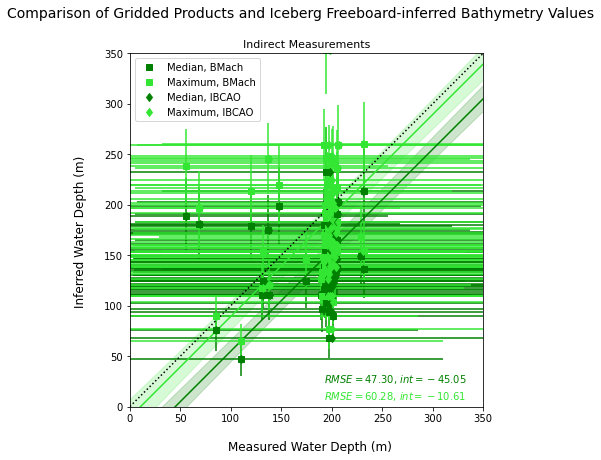

In [13]:
ibplot.meas_vs_infer_fig(gdf, save=False)